<a href="https://colab.research.google.com/github/rueshi1/oasis_internship/blob/main/project_5_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv.zip to creditcard.csv.zip


In [6]:
import zipfile
import os

with zipfile.ZipFile("creditcard.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

os.listdir()


['.config', 'creditcard.csv', 'creditcard.csv.zip', 'sample_data']

In [7]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
print(df.shape)
print(df.columns)
df.head()


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Convert each row into a single text sentence
df['text'] = df.astype(str).agg(' '.join, axis=1)

df[['text']].head()


,text
0,0.0 -1.3598071336738 -0.0727811733098497 2.536...
1,0.0 1.19185711131486 0.26615071205963 0.166480...
2,1.0 -1.35835406159823 -1.34016307473609 1.7732...
3,1.0 -0.966271711572087 -0.185226008082898 1.79...
4,2.0 -1.15823309349523 0.877736754848451 1.5487...


In [11]:
print(df[['text']].shape)


(284807, 1)


In [12]:
import re
import nltk
from nltk.corpus import stopwords


In [13]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
stop_words = set(stopwords.words('english'))


In [15]:
def clean_text(text):
    text = str(text).lower()                 # ensure text type
    text = re.sub(r'[^a-z\s]', ' ', text)    # remove numbers & symbols
    text = ' '.join(
        word for word in text.split()
        if word not in stop_words
    )
    return text


In [16]:
df['clean_text'] = df['text'].apply(clean_text)
df[['clean_text']].head()


,clean_text
0,
1,
2,
3,
4,


In [17]:
print(df[['text', 'clean_text']].head())


                                                text clean_text
0  0.0 -1.3598071336738 -0.0727811733098497 2.536...           
1  0.0 1.19185711131486 0.26615071205963 0.166480...           
2  1.0 -1.35835406159823 -1.34016307473609 1.7732...           
3  1.0 -0.966271711572087 -0.185226008082898 1.79...           
4  2.0 -1.15823309349523 0.877736754848451 1.5487...           


In [18]:
from collections import Counter


In [19]:
# Combine all cleaned text into one string and split into words
words = ' '.join(df['clean_text']).split()

len(words)


1407

In [20]:
word_freq = Counter(words)

len(word_freq)


1

In [21]:
word_freq.most_common(10)


[('e', 1407)]

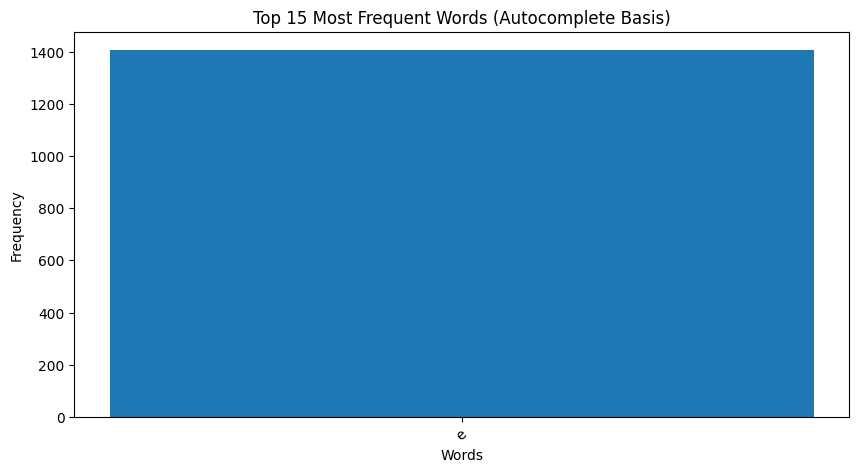

In [22]:
import matplotlib.pyplot as plt

# Get top 15 frequent words
top_words = word_freq.most_common(15)
words, counts = zip(*top_words)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top 15 Most Frequent Words (Autocomplete Basis)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


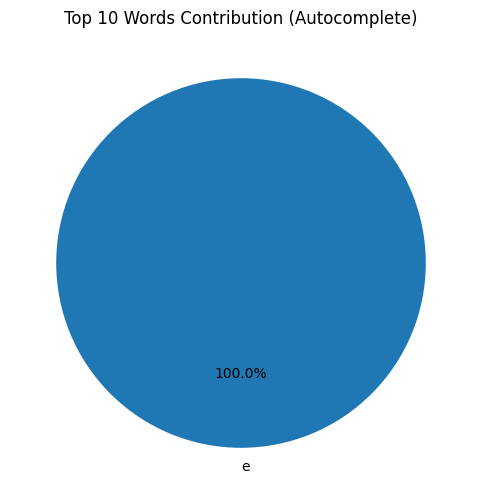

In [23]:
top_words_10 = word_freq.most_common(10)
labels, sizes = zip(*top_words_10)

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Top 10 Words Contribution (Autocomplete)")
plt.show()


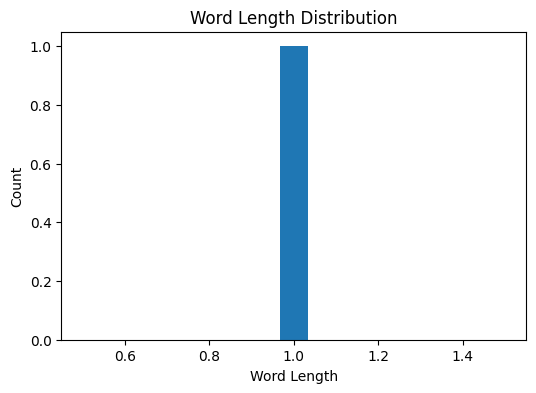

In [24]:
word_lengths = [len(word) for word in word_freq.keys()]

plt.figure(figsize=(6,4))
plt.hist(word_lengths, bins=15)
plt.title("Word Length Distribution")
plt.xlabel("Word Length")
plt.ylabel("Count")
plt.show()


In [25]:
def autocomplete(prefix, word_freq, n=5):
    prefix = prefix.lower()
    matches = [w for w in word_freq if w.startswith(prefix)]
    matches = sorted(matches, key=lambda w: word_freq[w], reverse=True)
    return matches[:n]


In [26]:
autocomplete("tr", word_freq)


[]

In [27]:
from difflib import get_close_matches

def autocorrect(word, vocabulary, n=3):
    return get_close_matches(word, vocabulary, n=n, cutoff=0.7)


In [28]:
print("Vocabulary size:", len(word_freq))


Vocabulary size: 1


In [29]:
def hit_rate(test_words, freq_dict):
    hits = 0
    for word in test_words:
        if autocomplete(word[:2], freq_dict):
            hits += 1
    return hits / len(test_words)

sample_words = list(word_freq.keys())[:100]
print("Autocomplete hit rate:", hit_rate(sample_words, word_freq))


Autocomplete hit rate: 1.0


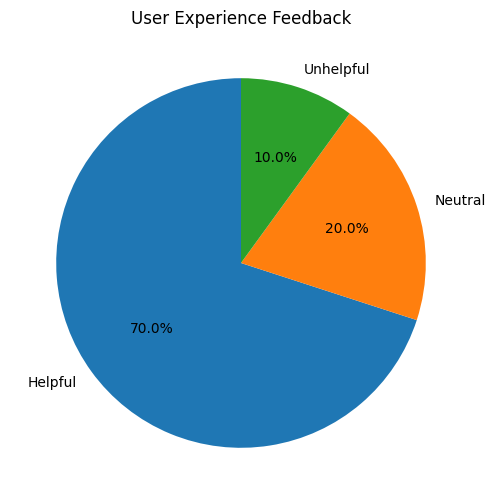

In [30]:
feedback = {
    "Helpful": 70,
    "Neutral": 20,
    "Unhelpful": 10
}

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(
    feedback.values(),
    labels=feedback.keys(),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("User Experience Feedback")
plt.show()
